Feature engineering & model building

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Load the cleaned and merged data
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\C C++\modi-country-prediction\data\merged_data.csv')


In [3]:
# Convert categorical features to numerical values
df['Event_Next_Year'] = df['Event_Next_Year'].apply(lambda x: 1 if x == 'Yes' else 0)

In [4]:
# Encode countries into labels
df['Country_Label'] = df['Country'].astype('category').cat.codes

In [5]:
# Feature selection
X = df[['Trade_Value', 'Event_Next_Year', 'Bilateral_Relation_Score']]
y = df['Country_Label']

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Predict on the test data
y_pred = rf_model.predict(X_test)


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 6.67%


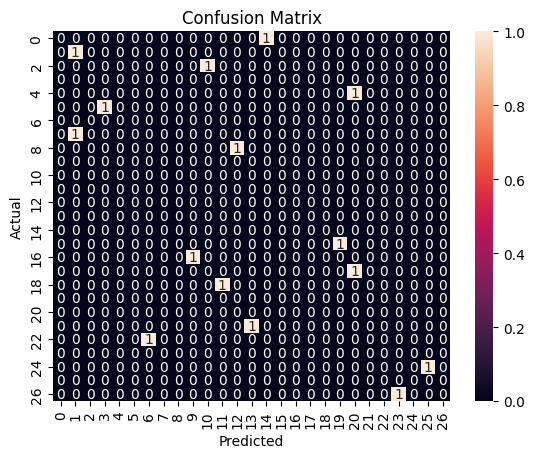

In [10]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Save the model to disk
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)